In [1]:
import pandas as pd
df = pd.read_csv('Sentiment140.csv', encoding='latin1', header=None)
df.columns = ['polarity', 'id', 'date', 'query', 'user', 'text']

In [2]:
print(df.head())

   polarity          id                          date     query  \
0         0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY   
1         0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   
2         0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY   
3         0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
4         0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   

              user                                               text  
0  _TheSpecialOne_  @switchfoot http://twitpic.com/2y1zl - Awww, t...  
1    scotthamilton  is upset that he can't update his Facebook by ...  
2         mattycus  @Kenichan I dived many times for the ball. Man...  
3          ElleCTF    my whole body feels itchy and like its on fire   
4           Karoli  @nationwideclass no, it's not behaving at all....  


In [3]:
print(df.shape)

(1600000, 6)


In [4]:
print(df.columns)

Index(['polarity', 'id', 'date', 'query', 'user', 'text'], dtype='object')


In [5]:
df.head()

,polarity,id,date,query,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [6]:
df['polarity'].value_counts()

polarity
0    800000
4    800000
Name: count, dtype: int64

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

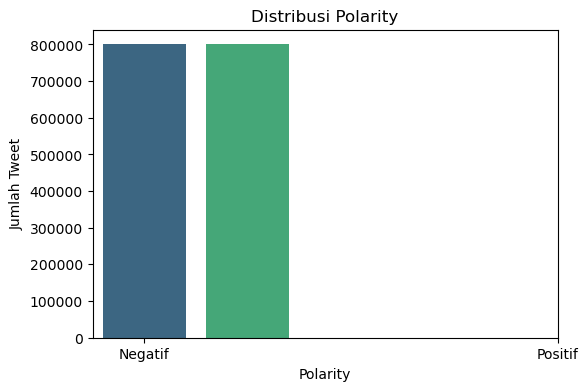

In [8]:
plt.figure(figsize=(6, 4))
sns.countplot(x='polarity', data=df, palette='viridis')
plt.title('Distribusi Polarity')
plt.xlabel('Polarity')
plt.ylabel('Jumlah Tweet')
plt.xticks([0, 4], ['Negatif', 'Positif'], rotation=0)
plt.show()

In [9]:
import re
from nltk.corpus import stopwords

In [10]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Rere\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
stop_words = set(stopwords.words('english'))
def clean_text(text):
    text = re.sub(r'http\S+|www\S+', '', text)  
    text = re.sub(r'@\w+', '', text) 
    text = re.sub(r'[^a-zA-Z\s]', '', text)  
    text = text.lower()  
    text = ' '.join([word for word in text.split() if word not in stop_words])  
    return text
df['cleaned_text'] = df['text'].apply(clean_text)

In [12]:
print(df[['text', 'cleaned_text']].head())

                                                text  \
0  @switchfoot http://twitpic.com/2y1zl - Awww, t...   
1  is upset that he can't update his Facebook by ...   
2  @Kenichan I dived many times for the ball. Man...   
3    my whole body feels itchy and like its on fire    
4  @nationwideclass no, it's not behaving at all....   

                                        cleaned_text  
0      thats bummer shoulda got david carr third day  
1  upset cant update facebook texting might cry r...  
2  dived many times ball managed save rest go bounds  
3                   whole body feels itchy like fire  
4                           behaving im mad cant see  


In [13]:
for i in range(5):  
    print(f"Teks Asli: {df['text'].iloc[i]}")
    print(f"Teks Dibersihkan: {df['cleaned_text'].iloc[i]}")
    print("-" * 50)

Teks Asli: @switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D
Teks Dibersihkan: thats bummer shoulda got david carr third day
--------------------------------------------------
Teks Asli: is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah!
Teks Dibersihkan: upset cant update facebook texting might cry result school today also blah
--------------------------------------------------
Teks Asli: @Kenichan I dived many times for the ball. Managed to save 50%  The rest go out of bounds
Teks Dibersihkan: dived many times ball managed save rest go bounds
--------------------------------------------------
Teks Asli: my whole body feels itchy and like its on fire 
Teks Dibersihkan: whole body feels itchy like fire
--------------------------------------------------
Teks Asli: @nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all 

In [14]:
df['original_length'] = df['text'].apply(len)
df['cleaned_length'] = df['cleaned_text'].apply(len)
print(df[['original_length', 'cleaned_length']].describe())

       original_length  cleaned_length
count     1.600000e+06    1.600000e+06
mean      7.409011e+01    4.291170e+01
std       3.644114e+01    2.425033e+01
min       6.000000e+00    0.000000e+00
25%       4.400000e+01    2.300000e+01
50%       6.900000e+01    3.900000e+01
75%       1.040000e+02    6.000000e+01
max       3.740000e+02    1.750000e+02


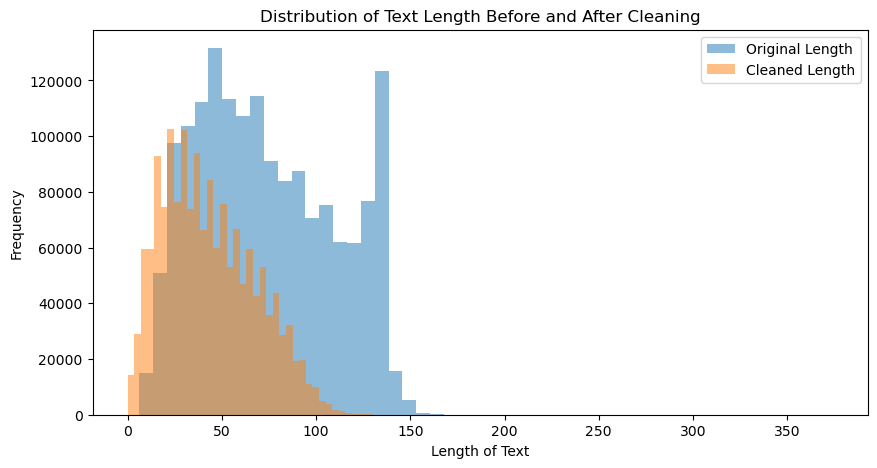

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.hist(df['original_length'], bins=50, alpha=0.5, label='Original Length')
plt.hist(df['cleaned_length'], bins=50, alpha=0.5, label='Cleaned Length')
plt.legend(loc='upper right')
plt.title('Distribution of Text Length Before and After Cleaning')
plt.xlabel('Length of Text')
plt.ylabel('Frequency')
plt.show()

In [16]:
!pip install wordcloud

In [17]:
from wordcloud import WordCloud

In [18]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [19]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Rere\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [20]:
df['query'].value_counts()

query
NO_QUERY    1600000
Name: count, dtype: int64

In [21]:
df = df.drop(columns=['query'])
print(df.head())

   polarity          id                          date             user  \
0         0  1467810369  Mon Apr 06 22:19:45 PDT 2009  _TheSpecialOne_   
1         0  1467810672  Mon Apr 06 22:19:49 PDT 2009    scotthamilton   
2         0  1467810917  Mon Apr 06 22:19:53 PDT 2009         mattycus   
3         0  1467811184  Mon Apr 06 22:19:57 PDT 2009          ElleCTF   
4         0  1467811193  Mon Apr 06 22:19:57 PDT 2009           Karoli   

                                                text  \
0  @switchfoot http://twitpic.com/2y1zl - Awww, t...   
1  is upset that he can't update his Facebook by ...   
2  @Kenichan I dived many times for the ball. Man...   
3    my whole body feels itchy and like its on fire    
4  @nationwideclass no, it's not behaving at all....   

                                        cleaned_text  original_length  \
0      thats bummer shoulda got david carr third day              115   
1  upset cant update facebook texting might cry r...              111   

In [22]:
duplicate_count = df.duplicated().sum()
print(f"Jumlah data duplikat: {duplicate_count}")

Jumlah data duplikat: 0


In [23]:
df.to_csv('cleaned_data.csv', index=False)

In [24]:
duplicates = df[df['id'].duplicated()]

print(duplicates)

duplicate_count = df['id'].duplicated().sum()
print(f"Jumlah ID yang duplikat: {duplicate_count}")


         polarity          id                          date          user  \
800261          4  1467863684  Mon Apr 06 22:33:35 PDT 2009      DjGundam   
800300          4  1467880442  Mon Apr 06 22:38:04 PDT 2009       iCalvin   
801280          4  1468053611  Mon Apr 06 23:28:09 PDT 2009   mariejamora   
801573          4  1468100580  Mon Apr 06 23:42:57 PDT 2009   cristygarza   
801650          4  1468115720  Mon Apr 06 23:48:00 PDT 2009    WarholGirl   
...           ...         ...                           ...           ...   
1598780         4  2193278017  Tue Jun 16 08:14:22 PDT 2009   janiecwales   
1599298         4  2193403830  Tue Jun 16 08:24:44 PDT 2009   lauren__x33   
1599385         4  2193428118  Tue Jun 16 08:26:44 PDT 2009     bubbles00   
1599440         4  2193451289  Tue Jun 16 08:28:37 PDT 2009  faiznurdavid   
1599931         4  2193576442  Tue Jun 16 08:38:45 PDT 2009    emma_b_xox   

                                                      text  \
800261   Awwh

In [25]:
print(df.head())

   polarity          id                          date             user  \
0         0  1467810369  Mon Apr 06 22:19:45 PDT 2009  _TheSpecialOne_   
1         0  1467810672  Mon Apr 06 22:19:49 PDT 2009    scotthamilton   
2         0  1467810917  Mon Apr 06 22:19:53 PDT 2009         mattycus   
3         0  1467811184  Mon Apr 06 22:19:57 PDT 2009          ElleCTF   
4         0  1467811193  Mon Apr 06 22:19:57 PDT 2009           Karoli   

                                                text  \
0  @switchfoot http://twitpic.com/2y1zl - Awww, t...   
1  is upset that he can't update his Facebook by ...   
2  @Kenichan I dived many times for the ball. Man...   
3    my whole body feels itchy and like its on fire    
4  @nationwideclass no, it's not behaving at all....   

                                        cleaned_text  original_length  \
0      thats bummer shoulda got david carr third day              115   
1  upset cant update facebook texting might cry r...              111   

In [26]:
print(df)

         polarity          id                          date             user  \
0               0  1467810369  Mon Apr 06 22:19:45 PDT 2009  _TheSpecialOne_   
1               0  1467810672  Mon Apr 06 22:19:49 PDT 2009    scotthamilton   
2               0  1467810917  Mon Apr 06 22:19:53 PDT 2009         mattycus   
3               0  1467811184  Mon Apr 06 22:19:57 PDT 2009          ElleCTF   
4               0  1467811193  Mon Apr 06 22:19:57 PDT 2009           Karoli   
...           ...         ...                           ...              ...   
1599995         4  2193601966  Tue Jun 16 08:40:49 PDT 2009  AmandaMarie1028   
1599996         4  2193601969  Tue Jun 16 08:40:49 PDT 2009      TheWDBoards   
1599997         4  2193601991  Tue Jun 16 08:40:49 PDT 2009           bpbabe   
1599998         4  2193602064  Tue Jun 16 08:40:49 PDT 2009     tinydiamondz   
1599999         4  2193602129  Tue Jun 16 08:40:50 PDT 2009   RyanTrevMorris   

                                       

In [27]:
df

,polarity,id,date,user,text,cleaned_text,original_length,cleaned_length
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",thats bummer shoulda got david carr third day,115,45
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,scotthamilton,is upset that he can't update his Facebook by ...,upset cant update facebook texting might cry r...,111,74
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,mattycus,@Kenichan I dived many times for the ball. Man...,dived many times ball managed save rest go bounds,89,49
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,ElleCTF,my whole body feels itchy and like its on fire,whole body feels itchy like fire,47,32
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,Karoli,"@nationwideclass no, it's not behaving at all....",behaving im mad cant see,111,24
...,...,...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,AmandaMarie1028,Just woke up. Having no school is the best fee...,woke school best feeling ever,56,29
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...,thewdbcom cool hear old walt interviews,78,39
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,bpbabe,Are you ready for your MoJo Makeover? Ask me f...,ready mojo makeover ask details,57,31
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...,happy th birthday boo alll time tupac amaru sh...,65,50


In [28]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')
min_date = df['date'].min()
max_date = df['date'].max()

print(f"Rentang tweet: {min_date.year} - {max_date.year}")

C:\Users\Rere\AppData\Local\Temp\ipykernel_13048\733311939.py:1: FutureWarning: Parsed string "Mon Apr 06 22:19:45 PDT 2009" included an un-recognized timezone "PDT". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instead pass the string without the timezone, then use .tz_localize to convert to a recognized timezone.
  df['date'] = pd.to_datetime(df['date'], errors='coerce')


Rentang tweet: 2009 - 2009


In [29]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['year_month'] = df['date'].dt.to_period('M')
first_month = df['year_month'].min()
last_month = df['year_month'].max()

print(f"Rentang tweet: {first_month} - {last_month}")

Rentang tweet: 2009-04 - 2009-06


In [30]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['year_month'] = df['date'].dt.to_period('M')
tweet_per_month = df['year_month'].value_counts().sort_values(ascending=False)
most_tweets_month = tweet_per_month.head(1)
print(f"Bulan dengan tweet terbanyak: {most_tweets_month}")

Bulan dengan tweet terbanyak: year_month
2009-06    923608
Freq: M, Name: count, dtype: int64


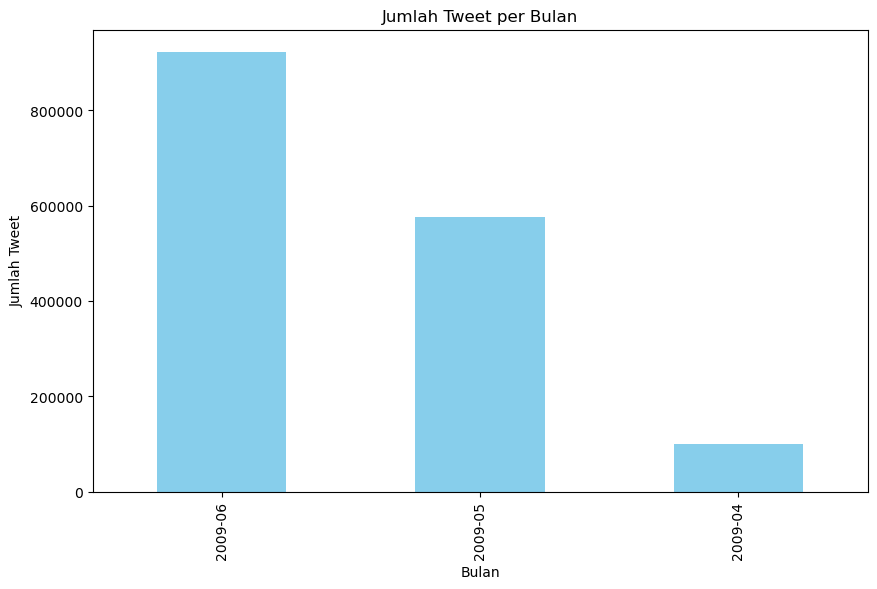

In [31]:
import matplotlib.pyplot as plt
tweet_per_month.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Jumlah Tweet per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Tweet')
plt.xticks(rotation=90)
plt.show()

In [32]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['year_month'] = df['date'].dt.to_period('M')
tweet_per_month = df['year_month'].value_counts().sort_index()

# Menentukan bulan dengan tweet terbanyak
most_tweets_month = tweet_per_month.idxmax()

# Filter data untuk bulan dengan tweet terbanyak
tweets_in_most_tweets_month = df[df['year_month'] == most_tweets_month]

# Hitung jumlah tweet dengan sentimen positif dan negatif
positive_tweets = tweets_in_most_tweets_month[tweets_in_most_tweets_month['polarity'] == 4]
negative_tweets = tweets_in_most_tweets_month[tweets_in_most_tweets_month['polarity'] == 0]

# hasil
print(f"Bulan dengan tweet terbanyak: {most_tweets_month}")
print(f"Jumlah tweet positif: {len(positive_tweets)}")
print(f"Jumlah tweet negatif: {len(negative_tweets)}")

# Menampilkan proporsi positif dan negatif
positive_percentage = len(positive_tweets) / len(tweets_in_most_tweets_month) * 100
negative_percentage = len(negative_tweets) / len(tweets_in_most_tweets_month) * 100

print(f"Persentase tweet positif: {positive_percentage:.2f}%")
print(f"Persentase tweet negatif: {negative_percentage:.2f}%")


Bulan dengan tweet terbanyak: 2009-06
Jumlah tweet positif: 390037
Jumlah tweet negatif: 533571
Persentase tweet positif: 42.23%
Persentase tweet negatif: 57.77%


C:\Users\Rere\AppData\Local\Temp\ipykernel_13048\1648597078.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_in_most_tweets_month['sentiment'] = tweets_in_most_tweets_month['polarity'].apply(lambda x: 'Positif' if x == 4 else 'Negatif')


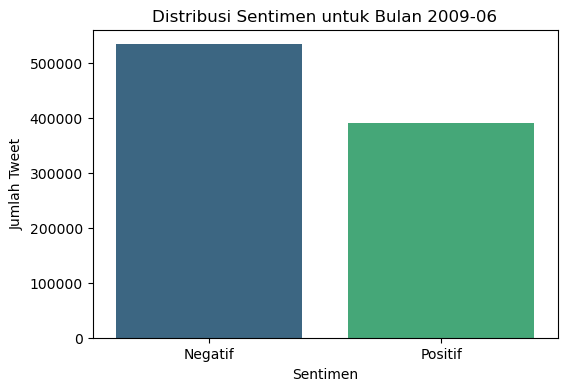

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
tweets_in_most_tweets_month['sentiment'] = tweets_in_most_tweets_month['polarity'].apply(lambda x: 'Positif' if x == 4 else 'Negatif')
plt.figure(figsize=(6, 4))
sns.countplot(x='sentiment', data=tweets_in_most_tweets_month, palette='viridis')
plt.title(f'Distribusi Sentimen untuk Bulan {most_tweets_month}')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah Tweet')
plt.show()

In [34]:
positive_tweets = df[df['polarity'] == 4]
negative_tweets = df[df['polarity'] == 0]

total_positive = len(positive_tweets)
total_negative = len(negative_tweets)

positive_percentage = (total_positive / len(df)) * 100
negative_percentage = (total_negative / len(df)) * 100

print(f"Total tweet positif: {total_positive}")
print(f"Total tweet negatif: {total_negative}")
print(f"Persentase tweet positif: {positive_percentage:.2f}%")
print(f"Persentase tweet negatif: {negative_percentage:.2f}%")


Total tweet positif: 800000
Total tweet negatif: 800000
Persentase tweet positif: 50.00%
Persentase tweet negatif: 50.00%


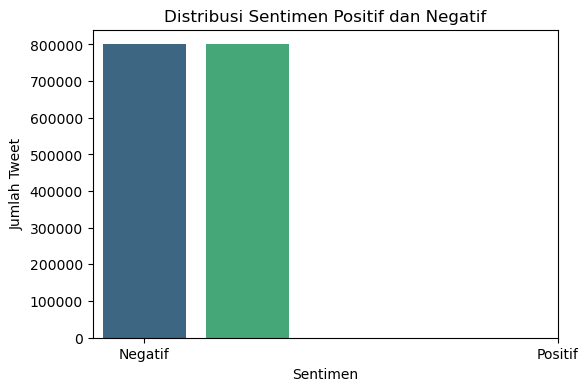

In [46]:
# Visualisasi distribusi tweet positif dan negatif
plt.figure(figsize=(6, 4))
sns.countplot(x='polarity', data=df, palette='viridis')
plt.title('Distribusi Sentimen Positif dan Negatif')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah Tweet')
plt.xticks([0, 4], ['Negatif', 'Positif'], rotation=0)
plt.show()


In [36]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

positive_tweets = df[df['polarity'] == 4]['cleaned_text']

vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(positive_tweets)

word_freq = X.sum(axis=0).A1  # Menggunakan .A1 untuk membuat array 1D

words = vectorizer.get_feature_names_out()

word_freq_df = pd.DataFrame({'word': words, 'count': word_freq})
word_freq_df = word_freq_df.sort_values(by='count', ascending=False)

print(word_freq_df.head(10))


          word  count
105364      im  75272
86804     good  60869
129314    love  46857
52095      day  45336
125564    like  37116
227292  thanks  33750
127619     lol  33511
86421    going  30650
230977    time  29348
232447   today  28430


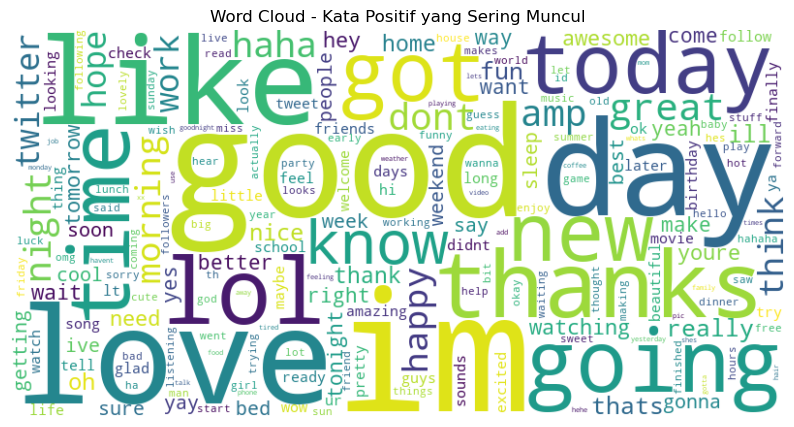

In [37]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

word_freq_dict = dict(zip(word_freq_df['word'], word_freq_df['count']))

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq_dict)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Kata Positif yang Sering Muncul')
plt.show()


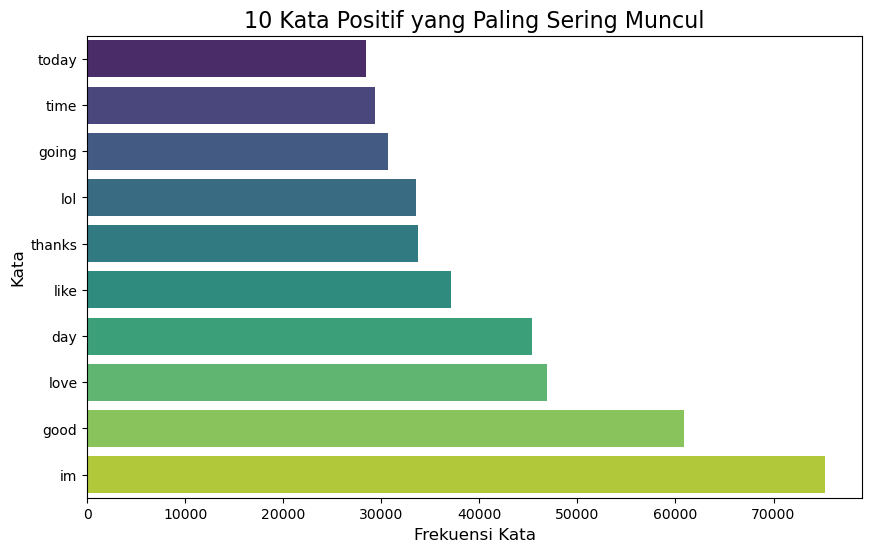

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

top_words = word_freq_df.head(10) 
top_words = top_words.sort_values(by='count', ascending=True) 

plt.figure(figsize=(10, 6))
sns.barplot(x='count', y='word', data=top_words, palette='viridis')

plt.title('10 Kata Positif yang Paling Sering Muncul', fontsize=16)
plt.xlabel('Frekuensi Kata', fontsize=12)
plt.ylabel('Kata', fontsize=12)

plt.show()


In [39]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Ambil tweet dengan polaritas negatif (0)
negative_tweets = df[df['polarity'] == 0]['cleaned_text']

# Gunakan CountVectorizer untuk menghitung frekuensi kata
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(negative_tweets)

# Menghitung frekuensi kata
word_freq = X.sum(axis=0).A1  # Menggunakan .A1 untuk membuat array 1D

# Mendapatkan daftar kata
words = vectorizer.get_feature_names_out()

# Membuat DataFrame untuk menampilkan kata dan frekuensinya
word_freq_df = pd.DataFrame({'word': words, 'count': word_freq})

# Mengurutkan berdasarkan frekuensi kata dari yang paling sering
word_freq_df = word_freq_df.sort_values(by='count', ascending=False)

# Menampilkan 10 kata negatif yang paling sering muncul
print(word_freq_df.head(10))


          word   count
98022       im  103129
55648     dont   45158
236050    work   44044
115731    like   40665
48535      day   39482
212438   today   36209
80552    going   33450
81750      got   33102
171432  really   31230
129628    miss   30506


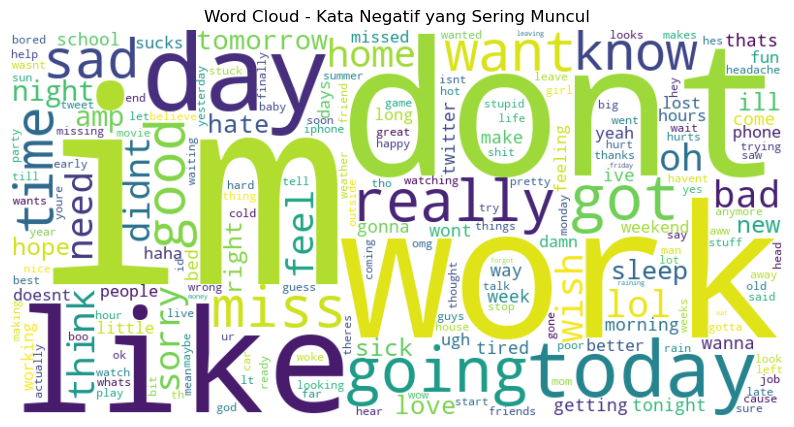

In [40]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Ambil tweet dengan polaritas negatif
negative_tweets = df[df['polarity'] == 0]['cleaned_text']

# Gunakan CountVectorizer untuk menghitung frekuensi kata
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(negative_tweets)

# Menghitung frekuensi kata
word_freq = X.sum(axis=0).A1  # Menggunakan .A1 untuk membuat array 1D

# Mendapatkan daftar kata
words = vectorizer.get_feature_names_out()

# Membuat dictionary untuk WordCloud
word_freq_dict = dict(zip(words, word_freq))

# Buat WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq_dict)

# Tampilkan WordCloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud - Kata Negatif yang Sering Muncul')
plt.axis('off')
plt.show()

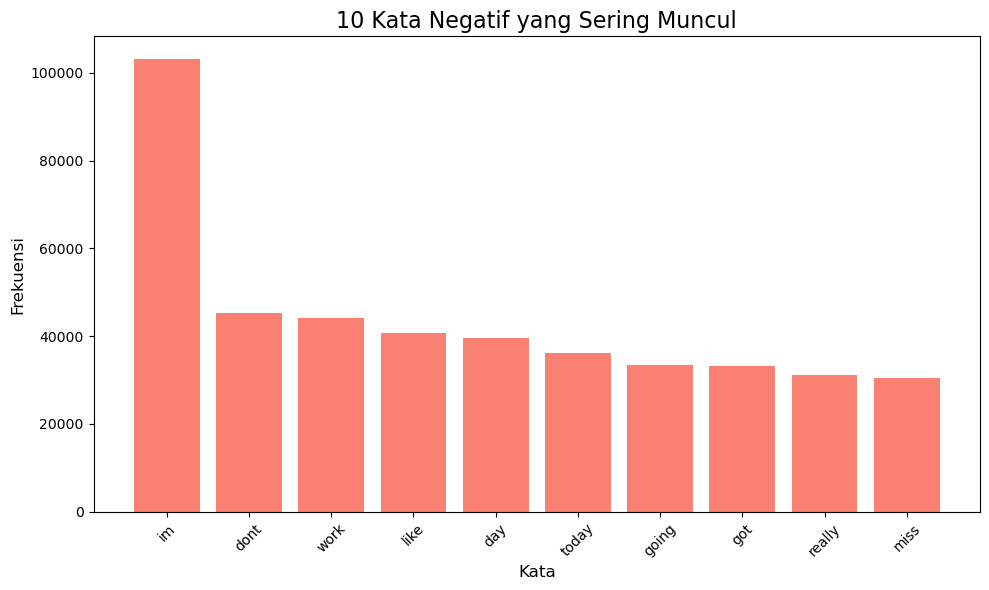

In [41]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import matplotlib.pyplot as plt

negative_tweets = df[df['polarity'] == 0]['cleaned_text']

vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(negative_tweets)

word_freq = X.sum(axis=0).A1
words = vectorizer.get_feature_names_out()

word_freq_df = pd.DataFrame({'word': words, 'count': word_freq})
word_freq_df = word_freq_df.sort_values(by='count', ascending=False).head(10)  # Ambil 10 kata terbanyak

plt.figure(figsize=(10, 6))
plt.bar(word_freq_df['word'], word_freq_df['count'], color='salmon')
plt.title('10 Kata Negatif yang Sering Muncul', fontsize=16)
plt.xlabel('Kata', fontsize=12)
plt.ylabel('Frekuensi', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [42]:
df.to_csv('cleaned.csv', index=False)

In [43]:
# Mengelompokkan data berdasarkan polaritas
positive_tweets = df[df['polarity'] == 4]
negative_tweets = df[df['polarity'] == 0]

# Menghitung jumlah tweet positif dan negatif
total_positive = len(positive_tweets)
total_negative = len(negative_tweets)
total_tweets = len(df)

# Menghitung persentase
positive_percentage = (total_positive / total_tweets) * 100
negative_percentage = (total_negative / total_tweets) * 100

# Menampilkan hasil
print(f"Total tweet positif: {total_positive}")
print(f"Total tweet negatif: {total_negative}")
print(f"Persentase tweet positif: {positive_percentage:.2f}%")
print(f"Persentase tweet negatif: {negative_percentage:.2f}%")


Total tweet positif: 800000
Total tweet negatif: 800000
Persentase tweet positif: 50.00%
Persentase tweet negatif: 50.00%


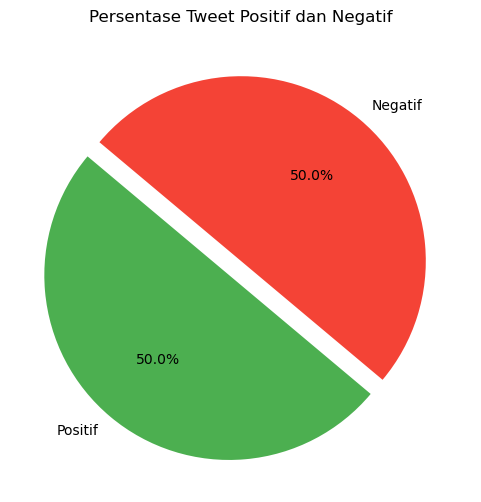

In [44]:
import matplotlib.pyplot as plt

# Data untuk diagram pie
labels = ['Positif', 'Negatif']
sizes = [positive_percentage, negative_percentage]
colors = ['#4CAF50', '#F44336']  # Warna hijau untuk positif, merah untuk negatif
explode = (0.1, 0)  # Meledakkan bagian positif

# Membuat diagram pie
plt.figure(figsize=(6, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Persentase Tweet Positif dan Negatif')
plt.show()

C:\Users\Rere\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


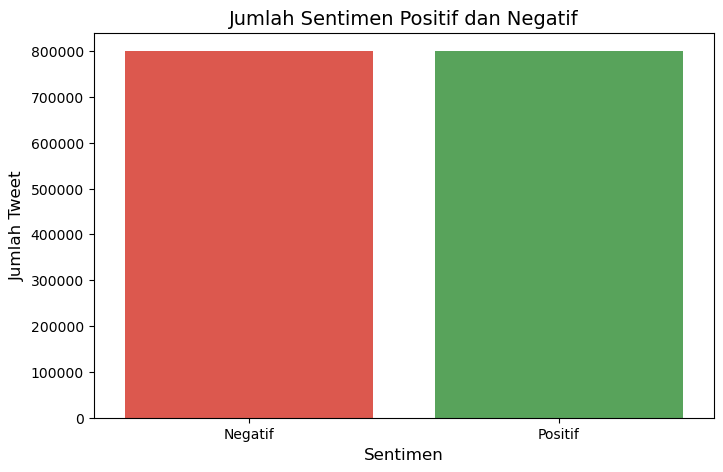

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data untuk visualisasi
sentiment_counts = df['polarity'].value_counts()  # Menghitung jumlah tweet per polaritas
sentiment_labels = ['Negatif', 'Positif']  # Label untuk polaritas 0 dan 4

# Membuat diagram batang
plt.figure(figsize=(8, 5))
sns.barplot(x=sentiment_labels, y=sentiment_counts, palette=['#F44336', '#4CAF50'])  # Warna merah & hijau
plt.title('Jumlah Sentimen Positif dan Negatif', fontsize=14)
plt.xlabel('Sentimen', fontsize=12)
plt.ylabel('Jumlah Tweet', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

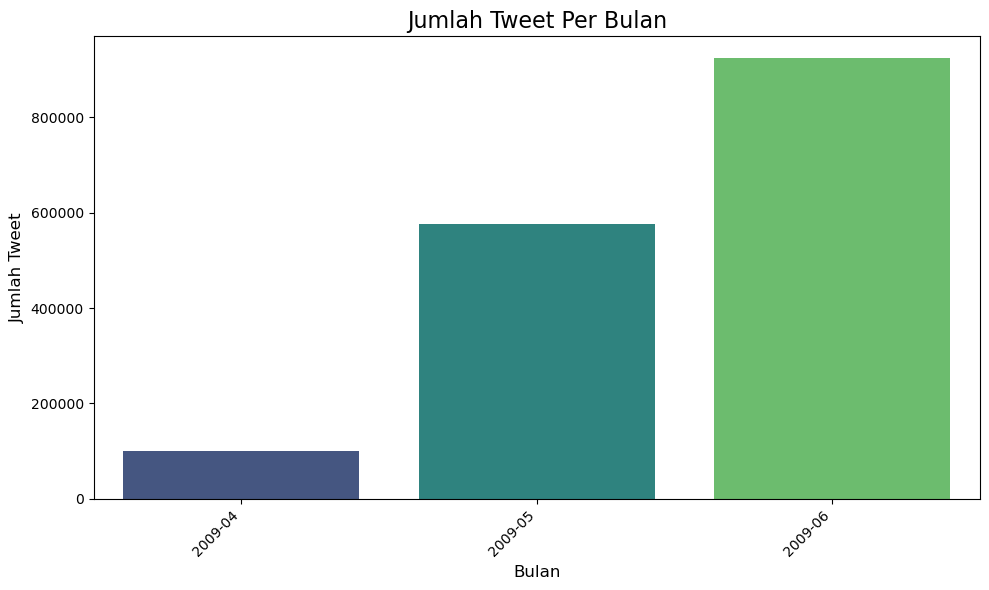

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Hitung jumlah tweet per bulan
tweet_count_per_month = df['year_month'].value_counts().sort_index()

# Buat visualisasi
plt.figure(figsize=(10, 6))
sns.barplot(x=tweet_count_per_month.index.astype(str), y=tweet_count_per_month.values, palette='viridis')

# Menambahkan label dan judul
plt.title('Jumlah Tweet Per Bulan', fontsize=16)
plt.xlabel('Bulan', fontsize=12)
plt.ylabel('Jumlah Tweet', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Tampilkan visualisasi
plt.tight_layout()
plt.show()


In [51]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['year_month'] = df['date'].dt.to_period('M')
tweet_per_month = df['year_month'].value_counts().sort_index()

# Menentukan bulan dengan tweet terbanyak
most_tweets_month = tweet_per_month.idxmax()

# Filter data untuk bulan dengan tweet terbanyak
tweets_in_most_tweets_month = df[df['year_month'] == most_tweets_month]

# Hitung jumlah tweet dengan sentimen positif dan negatif
positive_tweets = tweets_in_most_tweets_month[tweets_in_most_tweets_month['polarity'] == 4]
negative_tweets = tweets_in_most_tweets_month[tweets_in_most_tweets_month['polarity'] == 0]

# hasil
print(f"Bulan dengan tweet terbanyak: {most_tweets_month}")
print(f"Jumlah tweet positif: {len(positive_tweets)}")
print(f"Jumlah tweet negatif: {len(negative_tweets)}")

# Menampilkan proporsi positif dan negatif
positive_percentage = len(positive_tweets) / len(tweets_in_most_tweets_month) * 100
negative_percentage = len(negative_tweets) / len(tweets_in_most_tweets_month) * 100

print(f"Persentase tweet positif: {positive_percentage:.2f}%")
print(f"Persentase tweet negatif: {negative_percentage:.2f}%")

Bulan dengan tweet terbanyak: 2009-06
Jumlah tweet positif: 390037
Jumlah tweet negatif: 533571
Persentase tweet positif: 42.23%
Persentase tweet negatif: 57.77%


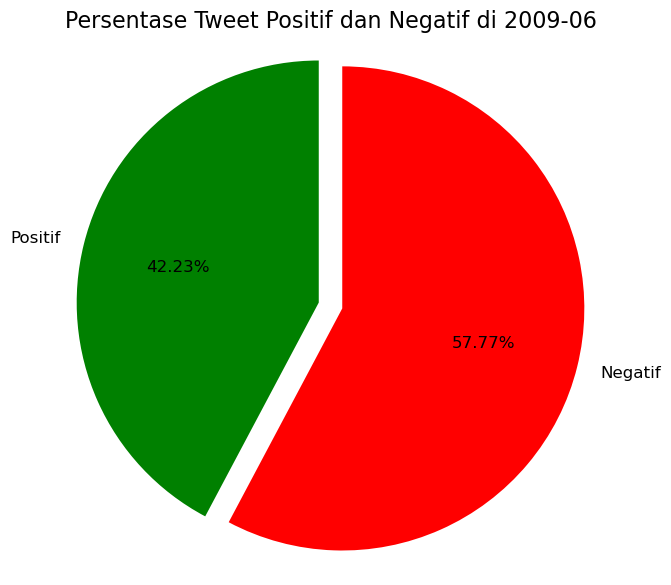

In [53]:
import matplotlib.pyplot as plt

# Persentase tweet positif dan negatif
positive_percentage = len(positive_tweets) / len(tweets_in_most_tweets_month) * 100
negative_percentage = len(negative_tweets) / len(tweets_in_most_tweets_month) * 100

# Membuat diagram pie
labels = ['Positif', 'Negatif']
sizes = [positive_percentage, negative_percentage]
colors = ['green', 'red']
explode = (0.1, 0)  # Memisahkan bagian 'Positif' sedikit agar lebih terlihat

plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, autopct='%1.2f%%', colors=colors, startangle=90, explode=explode, textprops={'fontsize': 12})

# Menambahkan judul
plt.title(f"Persentase Tweet Positif dan Negatif di {most_tweets_month}", fontsize=16)

# Tampilkan visualisasi
plt.axis('equal')  # Agar pie chart berbentuk bulat
plt.show()


In [54]:
import pandas as pd

# Membuat tabel perbandingan
comparison_table = df[['text', 'cleaned_text']].head(10)

# Menampilkan tabel
comparison_table

,text,cleaned_text
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",thats bummer shoulda got david carr third day
1,is upset that he can't update his Facebook by ...,upset cant update facebook texting might cry r...
2,@Kenichan I dived many times for the ball. Man...,dived many times ball managed save rest go bounds
3,my whole body feels itchy and like its on fire,whole body feels itchy like fire
4,"@nationwideclass no, it's not behaving at all....",behaving im mad cant see
5,@Kwesidei not the whole crew,whole crew
6,Need a hug,need hug
7,@LOLTrish hey long time no see! Yes.. Rains a...,hey long time see yes rains bit bit lol im fin...
8,@Tatiana_K nope they didn't have it,nope didnt
9,@twittera que me muera ?,que muera
